## Data Visualization

### Details

CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, including

10,177 number of identities,

202,599 number of face images, and

5 landmark locations, 40 binary attributes annotations per image.

**Citation**<br>
@inproceedings{liu2015faceattributes,<br>
 title = {Deep Learning Face Attributes in the Wild},<br>
 author = {Liu, Ziwei and Luo, Ping and Wang, Xiaogang and Tang, Xiaoou},<br>
 booktitle = {Proceedings of International Conference on Computer Vision (ICCV)},<br>
 month = {December},<br>
 year = {2015} <br>
}<br>

# Download the data set from the url mentioned below
https://www.kaggle.com/jessicali9530/celeba-dataset
Extract the folder in the same directory as the notebook file

In [109]:
import warnings # this is to suppress warnings caused by TensorFlow
warnings.simplefilter(action='ignore', category=FutureWarning)

In [110]:
#importing necessary modules numpy,pandas,seaborn,matplotlib
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from keras.preprocessing.image import load_img

In [111]:
#importing tensor flow
import tensorflow as tf 
tf.enable_eager_execution() 

In [112]:
#importing os module 
import os
data_dir = '../code_visualization/'
os.listdir(data_dir)

['.ipynb_checkpoints',
 'img_align_celeba',
 'list_attr_celeba.csv',
 'list_bbox_celeba.csv',
 'list_eval_partition.csv',
 'list_landmarks_align_celeba.csv',
 'Untitled.ipynb']

img_align_celeba folder: contains all the images in jpeg format<br><br>
list_eval_partition.csv: Recommended partitioning of images into training, validation, testing sets. Images 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing<br><br>
list_bbox_celeba.csv: Bounding box information for each image. "x_1" and "y_1" represent the upper left point coordinate of bounding box. "width" and "height" represent the width and height of bounding box<br><br>
list_landmarks_align_celeba.csv: Image landmarks and their respective coordinates. There are 5 landmarks: left eye, right eye, nose, left mouth, right mouth<br><br>
list_attr_celeba.csv: Attribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative<br>



### Importing data to pandas

In [113]:

df_attr = pd.read_csv(data_dir + 'list_attr_celeba.csv')
df_attr.replace(to_replace=-1, value=0, inplace=True)  # replacing the values of -1 to 0 

In [114]:
df_attr.head(10) #displaying the dataframe

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5,000006.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
6,000007.jpg,1,0,1,1,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1
7,000008.jpg,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
8,000009.jpg,0,1,1,0,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
9,000010.jpg,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [115]:
df_attr.columns #different attributes of a image

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [116]:
df_attr.shape#dataframe shape

(202599, 41)

In [117]:
for i,j in enumerate(df_attr.columns):
    print(i+1, j)

1 image_id
2 5_o_Clock_Shadow
3 Arched_Eyebrows
4 Attractive
5 Bags_Under_Eyes
6 Bald
7 Bangs
8 Big_Lips
9 Big_Nose
10 Black_Hair
11 Blond_Hair
12 Blurry
13 Brown_Hair
14 Bushy_Eyebrows
15 Chubby
16 Double_Chin
17 Eyeglasses
18 Goatee
19 Gray_Hair
20 Heavy_Makeup
21 High_Cheekbones
22 Male
23 Mouth_Slightly_Open
24 Mustache
25 Narrow_Eyes
26 No_Beard
27 Oval_Face
28 Pale_Skin
29 Pointy_Nose
30 Receding_Hairline
31 Rosy_Cheeks
32 Sideburns
33 Smiling
34 Straight_Hair
35 Wavy_Hair
36 Wearing_Earrings
37 Wearing_Hat
38 Wearing_Lipstick
39 Wearing_Necklace
40 Wearing_Necktie
41 Young


In [118]:
df_attr.describe()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,0.111136,0.266981,0.512505,0.204572,0.022443,0.151575,0.240796,0.234532,0.239251,0.147992,...,0.056511,0.48208,0.208402,0.319567,0.188925,0.048460,0.472436,0.122967,0.072715,0.773617
std,0.314301,0.442383,0.499845,0.403389,0.148121,0.358610,0.427568,0.423707,0.426627,0.355093,...,0.230906,0.49968,0.406167,0.466310,0.391450,0.214737,0.499241,0.328400,0.259669,0.418491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### comparing the count of male and female images

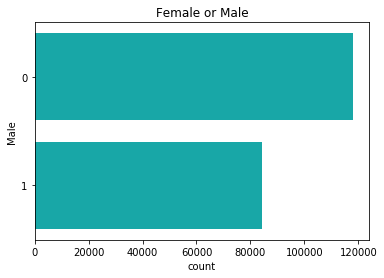

In [119]:

plt.title('Female or Male')
sns.countplot(y='Male', data=df_attr, color="c")
plt.show()

### Selecting a random image and checking its properties

In [120]:
images_folder = data_dir + "img_align_celeba/img_align_celeba"
example_pic = images_folder + "000039.jpg"

#### checking the attributes of selected image

Smiling    1
Male       0
Young      1
Name: 000039.jpg, dtype: int64

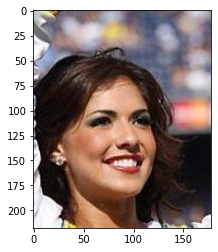

In [121]:
#using keras to load a image . we can still use plt.imread
df_attr.set_index('image_id', inplace=True)
img = load_img(example_pic)
plt.grid(False)
plt.imshow(img)
df_attr.loc[example_pic.split('/')[-1]][['Smiling','Male',"Young"]]

In [122]:
# properties of the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(178, 218)


#### converting the image to array and back to img using keras

In [123]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
# convert to numpy array
img_array = img_to_array(img)
print(img_array.dtype)
print(img_array.shape)

float32
(218, 178, 3)


In [124]:
# convert back to image
img_pil = array_to_img(img_array)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


### displaying randomly 25 images 

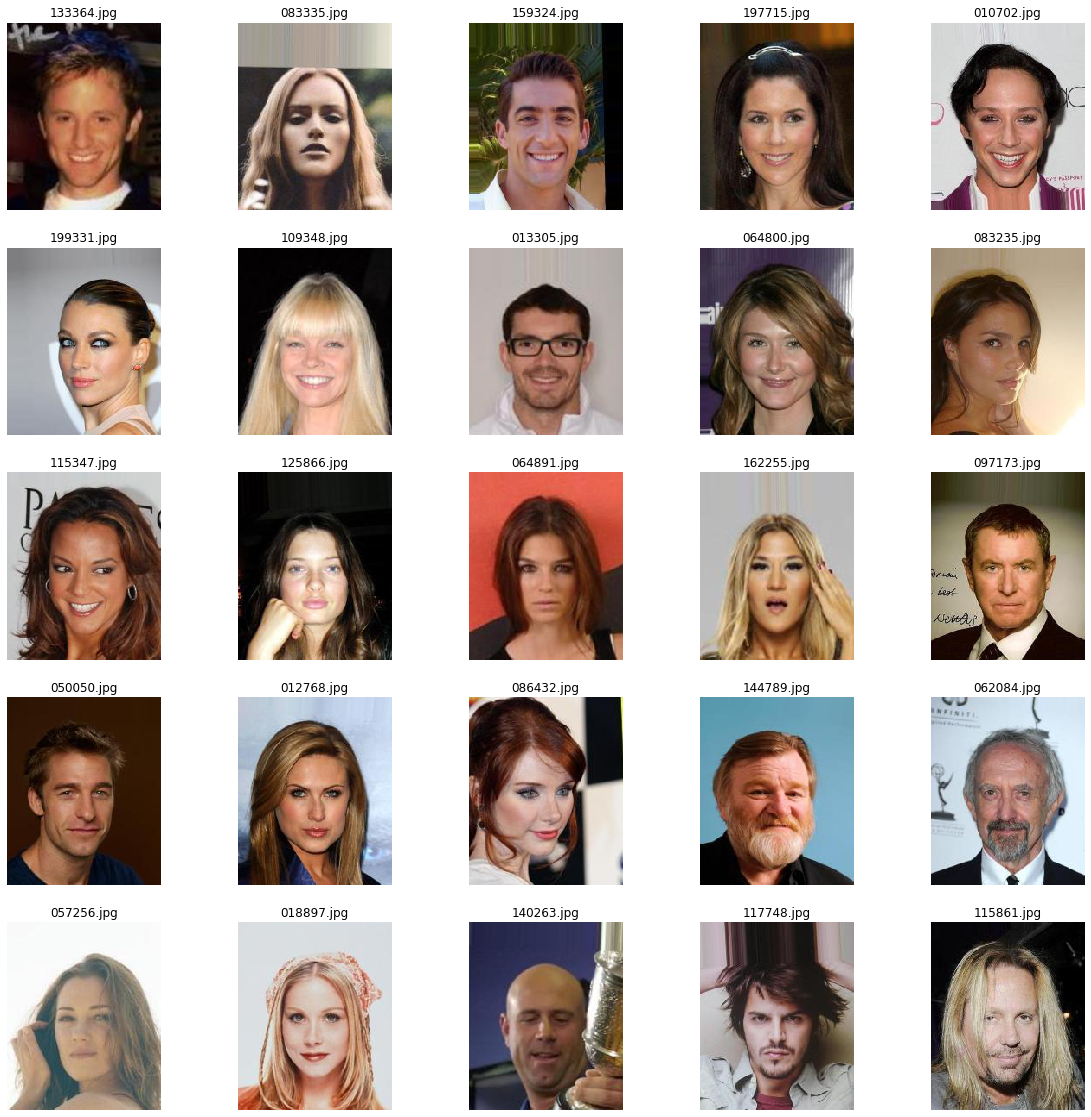

In [125]:
df_attr.reset_index(inplace = True) 
names_df = df_attr['image_id']
img_names = names_df.sample(n=25).values
plt.figure(figsize=(20,20))
for i, name in enumerate(img_names):
    plt.subplot(5, 5, i + 1)
    img = plt.imread(data_dir + 'img_align_celeba/img_align_celeba' + name)
    plt.imshow(img)
    plt.title(name)
    plt.axis('off')
_=plt.suptitle('')

### applying the blur filter to the images using a 7x7 kernal 

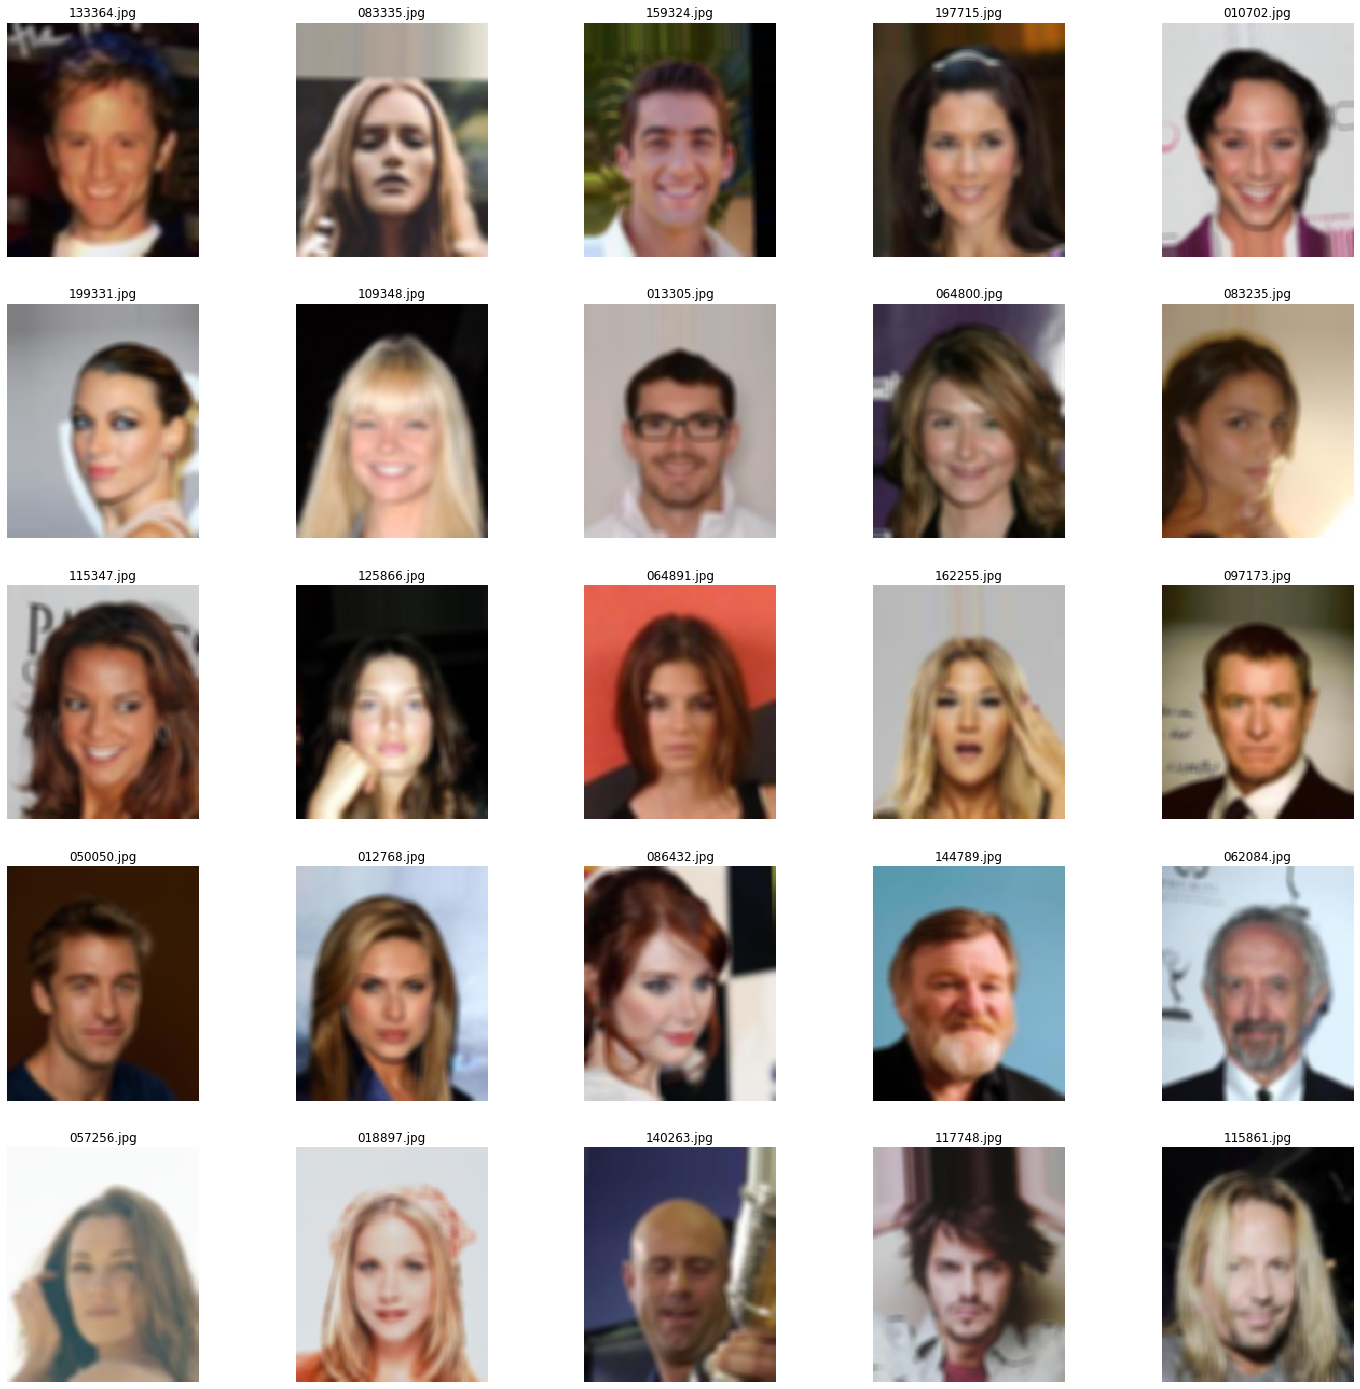

In [126]:
import cv2 
blur_filter = np.ones((7, 7), np.float)/(49.0) 
plt.figure(figsize=(25,25))
for i, name in enumerate(img_names):
    plt.subplot(5, 5, i + 1)
    img = plt.imread(data_dir + 'img_align_celeba/img_align_celeba' + name)
    image_blur1 = cv2.filter2D(img, -1, blur_filter)
    plt.imshow(image_blur1)
    plt.title(name)
    plt.axis('off')
_=plt.suptitle('')

### Correlation matrix

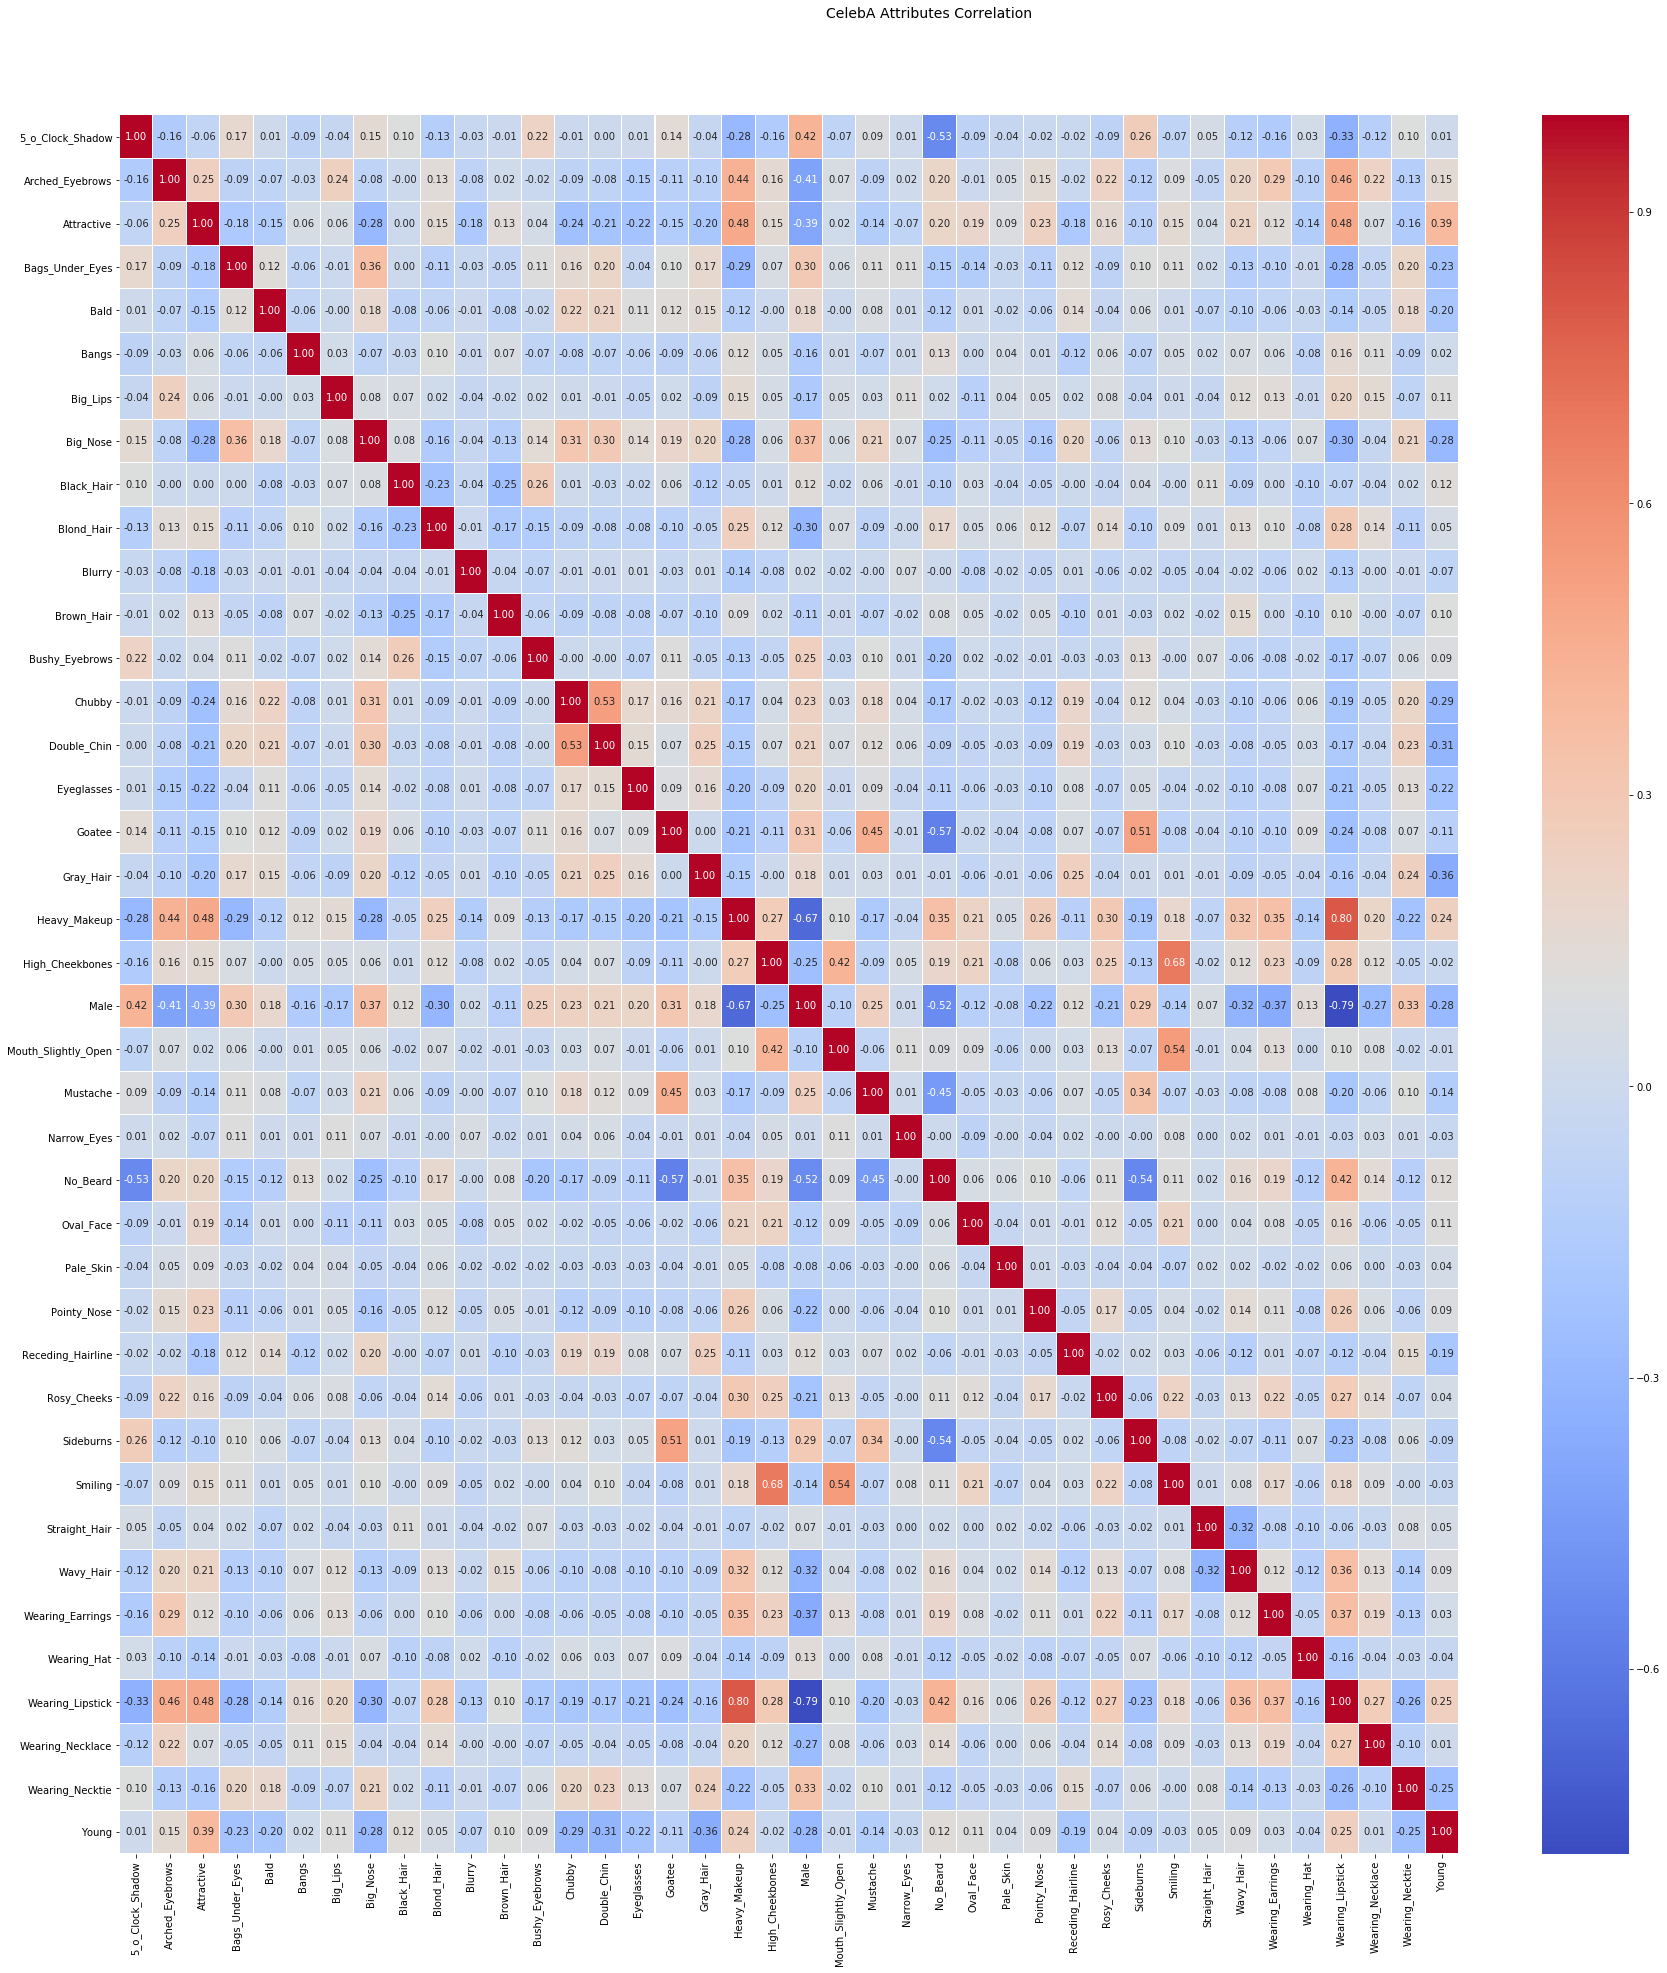

In [127]:
f, ax = plt.subplots(figsize=(30, 30))
corr = df_attr.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('CelebA Attributes Correlation', fontsize=14)

In [132]:
df2= df_attr[['Attractive','Bald','Brown_Hair','Chubby']]

In [133]:
df2.head()

,Attractive,Bald,Brown_Hair,Chubby
0,1,0,1,0
1,0,0,1,0
2,0,0,0,0
3,1,0,0,0
4,1,0,0,0


#### Pairplot with hue as 'attractive'  

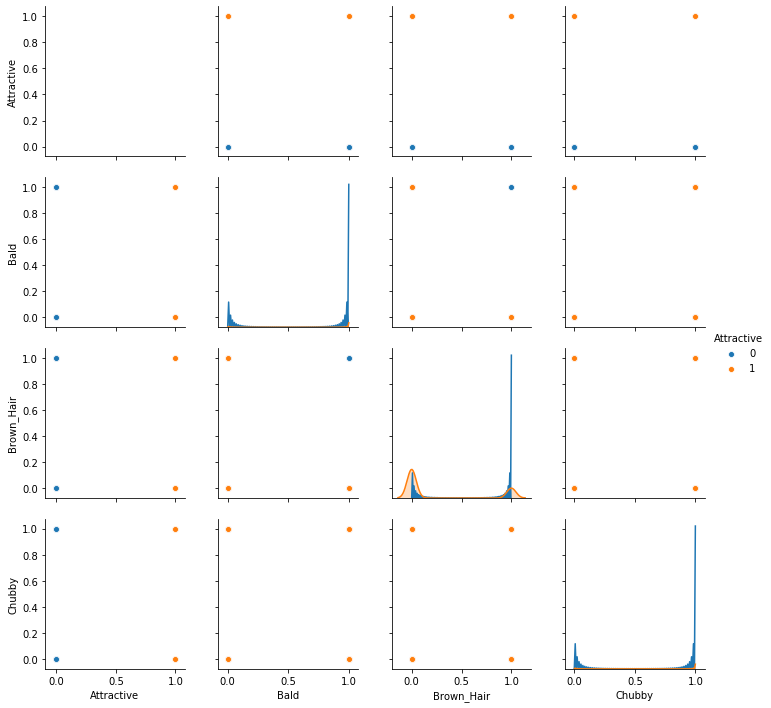

In [139]:
sns.pairplot(df2,hue='Attractive')